[Next]() | [Prev]() | [Home]()

---


# Chapter 1: Audio Features and Musical Objects #

### Subsections ###
1. What are Musical Sounds?
2. Human Listening vs Machine Listening
3. The [IRMAS Dataset](https://www.upf.edu/web/mtg/irmas)
4. Digital Audio Signals, a Multidimensional Object
5. Spectral Features in Digital Audio
6. Using Spectral Audio Features to Differente Musical Objects 

### 1.1 What are Musical Sounds? ###
The field of physics describes sound as pressure waves propagating through air (see Dunn & Hartmann's 2015 "Handbook of Acoustics"). From a psychophysical and psychological perspective sound is a perceptual phenomenon caused by pressure waves. For sound to exists, the brain must processes neuronal signals that were triggered by pressure waves reaching the ear (see Moore's 2012 book "An Introduction to the Psychology of Hearing"). With all of this considered, musical sounds can be defined as pressure waves carrying information that can trigger musical representations in the human brain. These representations can range from simple musical attributes like pitch, tempo, or melody, to more complex properties like harmony or musical genre. 

The fact that pressure waves propagating through air can result in the perception of music has aroused the curiosity of humanity for centuries. In the last century, advances in psychology and neuroscience have helped us better understand how the brain extracts features from sound in order to construct a musical percept (see Deutch's 2013 book "The Psychology of Music"). The following code and figures illustrate sound features that the brain can integrate to form the musical percept of the signing voice.

INFO: Pkg operations are not possible on JuliaBox. Please use the "Packages" menu at the top of the main screen.
INFO: Pkg operations are not possible on JuliaBox. Please use the "Packages" menu at the top of the main screen.
INFO: Recompiling stale cache file /mnt/juliabox/.julia/lib/v0.6/WAV.ji for module WAV.
INFO: Precompiling module Colors.
INFO: Precompiling module PyPlot.


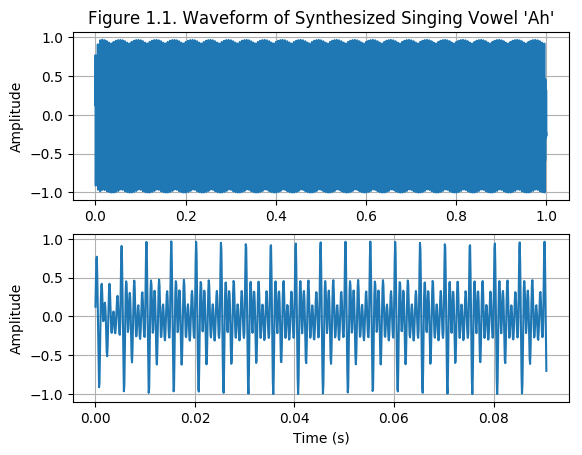

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
# installing some packages we will need
Pkg.add("WAV") # to load .wav files
Pkg.add("PyPlot") # to generate plots

# importing the packages
using WAV, PyPlot

# loading the file and obtaining some parameters
x, fs = wavread("ah.wav")
dur = length(x)/fs # duration in seconds
t = linspace(0,dur,length(x)) # time vector

# plotting
subplot(2,1,1)
title("Figure 1.1. Waveform of Synthesized Singing Vowel 'Ah'")
plot(t,x)
grid("on")
ylabel("Amplitude")
subplot(2,1,2)
plot(t[1:1000],x[1:1000])
grid("on")
xlabel("Time (s)")
ylabel("Amplitude");

Figure 1.1 shows the digital waveform of a synthetic human male voice singing the vowel 'ah'. The top subplot shows the waveform for the entire duration of the example and the bottom subplot zooms in to show only the first 1000 samples. 

To understand what a waveform is, remember a waveform's shape captures how pressure waves move air molecules (or a microphone diafragm) back and forth over time. In the bottom subplot we can appreciate that the waveform is extremely preriodic, capturing frequency information that, relatively speaking, is both slow (big peaks) and fast (smaller peaks).

The brain does not rely only on raw pressure waveforms to understand musical sounds. The cochlea in the human ear converts pressure waves into a time-frequency representation that the human brain is able to further process and understand (see Pickles' 2012 book "An Introduction to the Physiology of Hearing"). Similar to the cochlea and the brain, engineers and scientists use spectrograms to obtain time-frequency representations of pressure waves and analize them (see Smith's 2011 book "Spectral Audio Signal Processing"). Now we use a spectrogram to turn the synthetic human singing into its time-frequency representation. The cell below does this for us.

INFO: Pkg operations are not possible on JuliaBox. Please use the "Packages" menu at the top of the main screen.
INFO: Recompiling stale cache file /mnt/juliabox/.julia/lib/v0.6/SpecialFunctions.ji for module SpecialFunctions.
INFO: Recompiling stale cache file /mnt/juliabox/.julia/lib/v0.6/DSP.ji for module DSP.


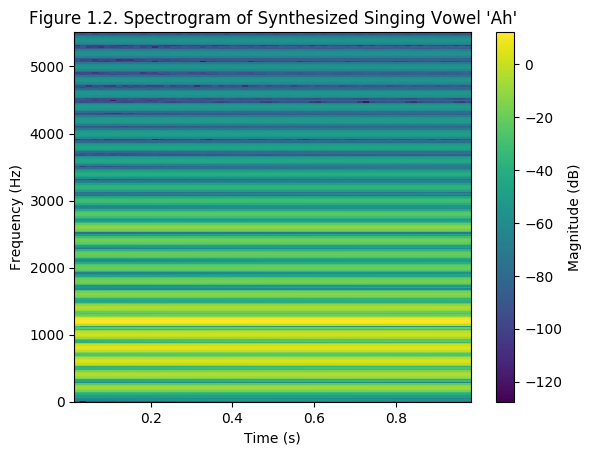

In [3]:
# installing and importing the Julia DSP package
Pkg.add("DSP")
using DSP

# setting parameters to calculate the spectrogram
frlength = floor(Int,length(x)/40) # frame length
noverlap = floor(Int,length(x)/100) # number of samples overlapping between frames

# calculating the spectrogram using a hanning window, making sure that x is a vector
X = spectrogram(vec(x), frlength, noverlap, nfft=nextpow2(frlength), window=hanning)

# extracting the spectrogram parameters we will need
t_s = time(X)
f = freq(X)
X = power(X)

# plotting
title("Figure 1.2. Spectrogram of Synthesized Singing Vowel 'Ah'")
imshow(10*log10.(X)[end:-1:1,:], extent=[first(t_s)/fs, last(t_s)/fs, fs*first(f), fs*last(f)], aspect="auto")
cb = colorbar()
cb[:set_label]("Magnitude (dB)")
xlabel("Time (s)")
ylabel("Frequency (Hz)");

Figure 1.2 shows us the time-frequency representation of the waveform in Figure 1.1. The time-frequency representation allows us to further analize the synthetic human voice singing the vowel 'ah'. Firstly, let's note that the spectrogram has equidistant horizontal bars, which tell us that the vowel has a fundamental frequency band (the lowest horizontal bar) and harmonics centered around higher frequency bands. Together, the fundamental and its harmonics cause the human brain to perceive pitch. Secondly, we note that not all bars have the same magnitude. The overall shape generated by different magnitudes across all frequency bands is known as the spectral magnitude envelope. This tells the human brain that this is the vowel 'ah' and not another vocal sound. 

In summary we have features and a musical object. The spectrogram shows two important features (1. frequency bands and 2. magnitude envelope). These features describe the human voice singing the vowel 'ah' as a specific musical object.

### 1.2 Human Listening vs Machine Listening ###
Can a computer listen to musical sounds in the same way that humans do? Since the year 2000, this is a question that motivates the work by engineers and scientist in the field of Music Information Retrieval (MIR). Since music listening is a very complex task, let's make a focused comparison of human vs machine listening for specific aspects of music listening.

When listening a short excerpt of music, the average human can identify features such as the kinds of musical instruments played (Giordano & McAdams 2010), the beat or tempo (Large et al. 2015), and the genre of music (Mace et al. 2012). Moreover, all of us have met (or are) music fans who can identify more abstract features like artists and names of songs that they are familiar with.

In recent years, advances in MIR have resulted in numerous algorithms that allow machines to identify musical instruments (Bhalke et al. 2016), the tempo (Large et al. 2015), the genre (Jeong & Lee 2016),  the artist (Eghbal-Zadeh et al. 2015), or the name (Wang 2003) of a song. Some of these systems have even surpassed human performance levels. 

How are these systems able to do carry out these tasks? In a nutshell, these systems are able to carry out these task because, like the human brain, they process and integrate features (i.e. the magnitude of a frequency band or the pitch of a sound) that meaningfully describe  a musical object (i.e. the vowel and pitch of singing speech or the identity of an instrument).

### 1.3 The [IRMAS Dataset](https://www.upf.edu/web/mtg/irmas) ###

Identifying which features better describe a musical object is where the job an MIR Engineer starts. This is a particularly tricky task, since a musical object can be described by an infinite number of features. Fortunately, some features are better than others for specific purposes. Hence, the MIR Engineer's job is to define a problem and identify which features are better to solve such problem.

Suppose we are interested in differentiating the sounds produced by different musical instruments. This is a problem that interested Botch and colleagues in 2012. Their goal was to identify the musical instrument(2) playing in any excerpt of musical audio. As a result of this investigation, they compiled and released the [IRMAS dataset](https://www.upf.edu/web/mtg/irmas).
<a href="https://www.upf.edu/web/mtg/irmas" target="_blank">
<img src="https://www.upf.edu/documents/8071534/8202271/IRMAS_0.png/ed05fe11-423a-9fc5-59a2-f6459c528981?t=1491914439723" style="width: 200px"/>
</a>    

The cell below loads a small version of the IRMAS dataset for you.

In [6]:
# a package to load data in .mat files
Pkg.add("MAT") 
using MAT

# loading a small version of the IRMAS dataset 
iris = matread("IRMAS_small.mat")
fs = 22050 # storing the sampling rate in a variable
T = 1/fs # and the timestep

# obtaining the data and corresponding instrument categories
data = iris["data"][:,1:end-1]
inst_cat = iris["data"][:,end];

INFO: Pkg operations are not possible on JuliaBox. Please use the "Packages" menu at the top of the main screen.


In its original form, the [IRMAS dataset](https://www.upf.edu/web/mtg/irmas) consists of three-second excerpts obtained from real music where an instrument is clearly heard and identified over the rest of the ensemble. There dataset contains data for eleven different musical instruments: 1) cello, 2) clarinet, 3) flute, 4) acoustic guitar, 5) electric guitar, 6) organ, 7) piano, 8) saxophone, 9) trumpet, 10) violin, and 11) human singing voice. For each instrument there are around 600 examples where it has been identified.

In the small version of the [IRMAS dataset](https://www.upf.edu/web/mtg/irmas) that we just loaded we have data for four different instruments: 1) cello, 2) flute, 3) piano, and 4) human singing voice. For each instrument we have 35 two-second excerpts (140 datapoints total). The sampling rate is 22050 samples per second. 

The variable `data` contains audio snippets in a matrix with 140 rows and 44100 columns (a 140x44100 matrix). Each row of `data` contains a two-second audio snippets where a particular musical instrument is clearly heard. The variable `inst_cat` (short for "instrument category") contains numbers that tell us the instrument category that corresponds to each row of `data`. `inst_cat` is a matrix with 140 rows and 1 column (also refered to as a 140x1 column vector). In `inst_cat`, a 1 at the index `i` indicates that the corresponding `i`th row of `data` contains cello audio. A 2 indicates flute audio, a 3 indicates piano audio, and a 4 indicates human singing voice audio. 

### 1.4 Digital Audio Signals, a Multidimensional Object ###

Let's randomly pick a row of `data` to visualize the waveform and its spectrogram. The cell below does this for us.

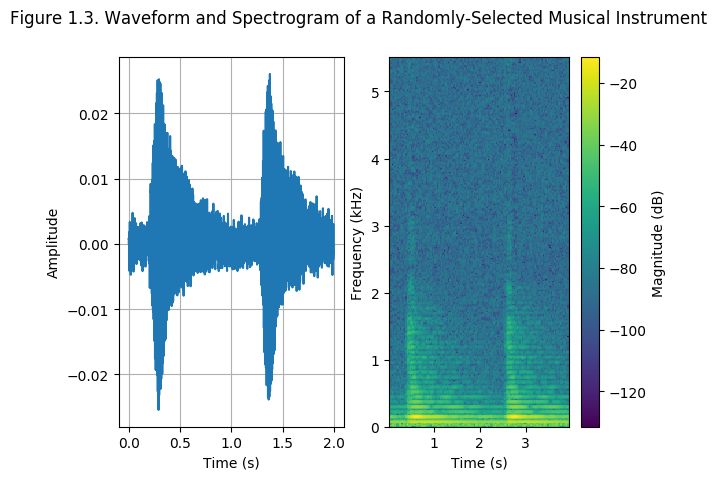

In [4]:
N, D = size(data) # The number of datapoints in data and their dimensionality

# randomly pick a row number
randi = rand(1:N,1)

# store the randomly selected waveform in a variable
x = data[randi,:]

# generate the time vector to plot the waveform
t = 0:T:(2-T)

# plot the waveform
subplot(1,2,1)
plot(t,x') # transpose x since plot expect two column vectors
grid("on")
axis("tight")
xlabel("Time (s)")
ylabel("Amplitude");

# declare general parameters for the spectrogram
frlength = floor(Int,D/80) # frame length
noverlap = floor(Int,D/200) # number of samples overlapping between frames

# calculate the spectrogram using a hanning window and make sure that x is a vector
X = spectrogram(vec(x), frlength, noverlap, nfft=nextpow2(frlength), window=hanning)

# extract the spectrogram parameters we will need
t_s = time(X)
f = freq(X)
X = power(X)

# plot the spectrogram
subplot(1,2,2)
imshow(10*log10.(X)[end:-1:1,:], extent=[first(t_s)/fs, last(t_s)/fs, fs*first(f)/1000, fs*last(f)/1000], aspect="auto")
cb = colorbar()
cb[:set_label]("Magnitude (dB)")
xlabel("Time (s)")
ylabel("Frequency (kHz)");

# add a global title
suptitle("Figure 1.3. Waveform and Spectrogram of a Randomly-Selected Musical Instrument");

Figure 1.3 shows the waveform (left) and the spectogram (right) for a randomly-picked datapoint from the small version of the [IRMAS dataset](https://www.upf.edu/web/mtg/irmas). 

Let's analize the dimensionality of the time representation and the time-frequency representation a single datapoint. The waveform is two-seconds long and the data was recorded with a sampling rate of 22050 samples per second. Hence, a single datapoint in the small version of the [IRMAS dataset](https://www.upf.edu/web/mtg/irmas) is 44100 samples (or 44100-dimensional). The resulting spectrogram has 66 time frames and 513 frequency bins, which means that the time-frequency representation of a datapoint is 66x513 dimensional. 

Audio signals are multidimensional. In practice, any datapoint with more than three dimensions is considered to be multidimensional. The three-dimension cutt-off is based on the fact that visualization of multidimensional data is imposible (we cannot see more than three dimensions at a given point in time). 

Idealy, computers shold be able to process as many dimensions in data as there are available. This is what the human brain does quickly (in real time 24/7) and intelligently (optimally differentiating meaningfull and meaningless information when carrying out a task). In practice, however, a computer's processing of multidimensional can be complicated for two main reasons: (1) handling more data requires more time and greater computational power, and (2) a lot of algorithms treat all data equally, which means that a computer may not know how to identify the subset of dimensions that contain the most meaninfgul information.

The field of MIR focuses on identifying ways to reduce the dimensionality of the data and also on developing algorithms to intelligently process data. Dimensionality reduction is achieved by developing mathematical functions that take multiple data dimensions and calculate a single value or a small groups of values that tell us how the dimensions are related to each other. More intelligent MIR algorithms are achieved by better mimicking the listening mechanisms of the brain or harnessing the mathematical properties of data. First, we will review ways to reduce the dimensionality by extracting spectral features from digital audio data. 

### 1.5 Spectral Features in Digital Audio ###

To simply our handling of the datapoints in the [IRMAS dataset](https://www.upf.edu/web/mtg/irmas), let's reduce its dimensionality by extracting spectral features. We will focus on three commonly used spectral features: 1) the spectral centroid, 2) the spectral bandwidth, and 3) the Mel-frequency cepstral coefficients. To obtain any of these spectral features we must first calculate the spectrum $X$ of a datapoint $x$ using the Discrete Fourier Transform.

#### The Spectral Centroid and the Power Spectral Centroid ####

The spectral centroid is a scalar value that describes the relative brightness of a sound. Once we have the spectrum $X$, we use only the positive frequencies in the spectrum to calculate the spectral centroid with the formula:

$$c_s = \frac{\sum_k f(k)|X(k)|}{\sum_k |X(k)|}$$

Where $|X(k)|$ is the magnitude of the spectrum at frequency bin $k$, and $f(k)$ is the frequency at frequency bin $k$ (in herz or radians). 

Instead of calculating it using the spectral magnitude $|X(k)|$, the centroid can also be calculated with the power of the spectrum $|X(k)|^2$ using the formula:

$$c_p = \frac{\sum_k f(k)|X(k)|^2}{\sum_k |X(k)|^2}$$

This is known as the power spectral centroid.

To calculate the centroid of a datapoint containing a relatively long piece of audio (like the ones in the [IRMAS dataset](https://www.upf.edu/web/mtg/irmas)), a spectrogram is computed first so that different spectra exist for different timebins. Then, the centroid is computed for each timebin in the spectrogram. Next, the average (mean) centroid across the spectrogram and its standard deviation are calculated to be used as features.

The next cell shows how to reduce the dimensionality of the small [IRMAS dataset](https://www.upf.edu/web/mtg/irmas) by extracting the average spectral centroid and average power spectral centroid, as well as their standard deviation.

In [7]:
# Remembering the number of datapoints in data and their dimensionality
N, D = size(data)

# declaring general parameters for the spectrogram
frlength = floor(Int,D/80) # frame length
noverlap = floor(Int,D/200) # number of samples overlapping between frames

# initialize a new matrix to store the reduced data
centData = zeros(N,4)

# let's iterate over the datapoints
for i = 1:N
   
    # calculate the spectrogram for each datapoint like we have done before
    X = spectrogram(data[i,:], frlength, noverlap, nfft=nextpow2(frlength), window=hanning)

    # extract the spectrogram parameters that we will need
    f = freq(X)
    X = power(X)

    # to calculate the spectral centroid for each timebin
    # first multiply the magnitudes by the frequency bins
    fX = f.*sqrt.(X)
    # next sum the values in fX for each timebin
    fXsum = sum(fX,1)
    # then sum the values in sqrt.(X) for each timebin
    Xsum = sum(sqrt.(X),1)
    # now divide fXsum by Xsum
    centroids = fXsum./Xsum
    # finally compute the mean and standard deviation
    meanCent = mean(centroids)
    stdCent = std(centroids)

    # to calculate the power spectral centroid for each timebin
    # first multiply the power by the frequency bins
    fX = f.*X
    # next sum the values in fX for each timebin
    fXsum = sum(fX,1)
    # then sum the values in X for each timebin
    Xsum = sum(X,1)
    # now divide fXsum by Xsum
    centroids = fXsum./Xsum
    # finally compute the mean and standard deviation
    meanPCent = mean(centroids)
    stdPCent = std(centroids)
    
    # and store these values for later use
    centData[i,:] = [meanCent stdCent meanPCent stdPCent]

end

Now we have a matrix `centData` of size 140x4. The rows are datapoints whose dimensions have been reduced from 44100 to 4. For each datapoint, the first column contains the mean spectral centroid and the second column contains its standard deviation, while the third column contains the mean power spectral centroid and the fourth column contains its standard deviation.

#### The Spectral Bandwidth ###

Another very commonly used spectral feature is the spectral bandwidth. The spectral bandwidth is a magnitude-weighted standard deviation of the information in the spectrum. It can be calculated using the positive frequencies of the spectrum $X$ and either the spectral centroid $c_s$:

$$spectral~bandwidth = \sqrt{\frac{\sum_k|X(k)|(f(k) - c_s)^2}{\sum_k |X(k)|}}$$

or the power spectral centroid $c_p$:

$$power~spectral~bandwidth = \sqrt{\frac{\sum_k|X(k)|^2(f(k) - c_p)^2}{\sum_k |X(k)|^2}}$$

Similar to the calculation of the centroid, a spectrogram is computed first so that different spectra exist for different timebins. Then, the centroid is computed for each timebin in the spectrogram. Next, the spectral bandwidth is computed for each timebin. Finally, the average spectral bandwidth across the spectrogram and its standard deviation are calculated to be used as features.

The next cell shows how to extract the average spectral bandwidth and its standard deviation from the small version of the [IRMAS dataset](https://www.upf.edu/web/mtg/irmas).

In [8]:
# Remembering the number of datapoints in data and their dimensionality
N, D = size(data)

# declaring general parameters for the spectrogram
frlength = floor(Int,D/80) # frame length
noverlap = floor(Int,D/200) # number of samples overlapping between frames

# initialize a new matrix to store the reduced data
SBData = zeros(N,4)

# let's iterate over the datapoints
for i = 1:N
   
    # calculate the spectrogram for each datapoint like we have done before
    X = spectrogram(data[i,:], frlength, noverlap, nfft=nextpow2(frlength), window=hanning)

    # extract the spectrogram parameters that we will need
    f = freq(X)
    X = power(X)

    # to calculate the spectral centroid for each timebin    
    # first multiply the magnitudes by the frequency bins 
    fX = f.*sqrt.(X)
    # next sum the values in fX for each timebin
    fXsum = sum(fX,1)
    # then sum the values in sqrt.(X) for each timebin
    Xsum = sum(sqrt.(X),1)
    # now divide fXsum by Xsum
    centroids = fXsum./Xsum

    # to calculate the spectral bandwidth for each timebin
    # first subtract the spectral centroids from the frequency bins 
    # and raise to the power of 2
    fminc = (f.*ones(size(X)) .- centroids).^2
    # next multiply fminc by the spectral magnitudes sqrt.(X)
    devs = fminc.*sqrt.(X)
    # sum the values in each timebin of devs and 
    # divide them by the sum of values in each timebin of sqrt.(X)
    # also take the square root of everything
    SBs = sqrt.(sum(devs,1)./sum(sqrt.(X),1))
    
    # finally compute the mean and standard deviation
    meanSB = mean(SBs)
    stdSB = std(SBs)

    # to calculate the power spectral centroid for each timebin
    # first multiply the power by the frequency bins
    fX = f.*X
    # next sum the values in fX for each timebin
    fXsum = sum(fX,1)
    # then sum the values in X for each timebin
    Xsum = sum(X,1)
    # now divide fXsum by Xsum
    centroids = fXsum./Xsum
    
    # to calculate the power spectral bandwidth for each timebin
    # first subtract the spectral centroids from the frequency bins 
    # and raise to the power of 2
    fminc = (f.*ones(size(X)) .- centroids).^2
    # next multiply fminc by the spectral powers X
    devs = fminc.*X
    # sum the values in each timebin of devs and 
    # divide them by the sum of values in each timebin of X
    # also take the square root of everything
    SBs = sqrt.(sum(devs,1)./sum(X,1))    
    
    # finally compute the mean and standard deviation
    meanPSB = mean(SBs)
    stdPSB = std(SBs)
    
    # and store these values for later use
    SBData[i,:] = [meanSB stdSB meanPSB stdPSB]

end

We now also have a matrix called `SBData` of size 140x4. The rows are datapoints whose dimensions have been reduced from 44100 to 4. For each datapoint, the first column contains the mean spectral density and the second column contains its standard deviation, while the third column contains the mean power spectral density and the fourth column contains its standard deviation.

#### Mel-frequency Cepstral Coefficients ####

The Mel-frequency cepstral coefficients (MFCCs) are a set of very useful spectral features. MFCCs were designed to better represent how the human ear processes an audio signal (Mermelstein 1976). Experiments showed that humans tend to underestimate high frequency bandwidths compared to low frequency ones. Hence, MFCCs are obtained by filtering the spectrum of a signal with N equally-spaced frequency bands. Computing MFCCs is a multistep process (instead of a single formula). Here we draw a single datapoint from `data` and illustrate the steps needed to obtain the MFCCs:

1.Compute the spectrogram of the signal and keep only the positive frequencies

In [9]:
N, D = size(data) # The number of datapoints in data and their dimensionality

# randomly pick a row number
randi = rand(1:N,1)

# store the randomly selected waveform in a variable
x = data[randi,:]

# declaring general parameters for the spectrogram
frlength = floor(Int,D/80) # frame length
noverlap = floor(Int,D/200) # number of samples overlapping between frames

# calculate the spectrogram for each datapoint like we have done before
X = spectrogram(vec(x), frlength, noverlap, nfft=nextpow2(frlength), window=hanning)

# extract the spectrogram parameters that we will need
f = freq(X)
X = power(X);

<ol start="2">
  <li>Find N equidistant center frequencies in the Mel scale to design bandpass filters, and convert them from the Mel scale to hetz. Use the formula $f=700(10^{\frac{m}{2595}} - 1)$ to convert from Mels to herz, and the formula $m=2595\log_{10}(1+f/700)$ to convert from herz to Mels (Ganchev et al. 2005).</li>
</ol>

In [10]:
# let's obtain the number of bins in the entire spectrum (positive and negative frequencies)
NFFT=nextpow2(frlength)

# Here we use 24 Mel filters. This is a number you can change if you want. So the number of Mel frequencies that we need is 24 + 2. 
Nm = 24 + 2

# Generating equally-spaced frequencies in the Mel scale in the range from DC to Nyquist
melDC = 0
melNyq = 2595*log10(1 + (fs/2)/700)
m = linspace(melDC,melNyq,Nm) 

# converting the Mel scale frequencies to Hz
f_m = 700*(10.^(m/2595) - 1)

# now let's find the indices of f containing the values that are closer to the values in f_m
f_j = floor.(Int,NFFT*f_m/fs) + 1;

<ol start="3">
  <li>Generate the triangular overlapping windows of equally-spaced frequency bands. To do that we use the formula below for each of the indices we have in $f_j$ (Ganchev et al. 2005).</li>
</ol>

$$
    H(k) = \left\{\begin{array}{lr}
        0, & \text{for } k\leq f_j(i-1)\\
        \frac{k-f_j(i-1)}{f_j(i) - f_j(i-1)}, & \text{for } f_j(i-1)\leq k\leq f_j(i)\\
        \frac{f_j(i+1)-k}{f_j(i+1) - f_j(i)}, & \text{for } f_j(i)< k\leq f_j(i+1)\\
        0, & \text{for } k > f_j(i+1)\\
        \end{array}\right\}
$$

Where $f_j$ are the indices of `f` that contain the center frequency for each bandpass filter.

In [11]:
# initialize the matrix where we will store the triangular band-pass filters
H = zeros(Nm - 2,size(X)[1])

# iterate over the center frequencies of the filters
for i = 2:Nm-1 # skip the first and last one
    for k = 1:size(X)[1] # iterate over the frequency bins

        # follow the equation
        if k <= f_j[i-1] 
            H[i-1,k] = 0
        elseif f_j[i-1] <= k <= f_j[i]
            H[i-1,k] = (k-f_j[i-1])/(f_j[i] - f_j[i-1])            
        elseif f_j[i] < k <= f_j[i+1]        
            H[i-1,k] = (f_j[i+1]-k)/(f_j[i+1] - f_j[i])            
        elseif k > f_j[i+1]        
            H[i-1,k] = 0    
        end
        
    end
end

<ol start="4">
  <li>Compute the inner-product between the spectra and the filters at all timebins.</li>
</ol>

In [12]:
Xfilt = H*X;

<ol start="5">
  <li>Compute the $\log_{10}$ of `Xfilt`.</li>
</ol>

In [13]:
Xfiltl = log10.(Xfilt);

<ol start="6">
  <li>Compute the Discrete Cosine Transform along the columns of `Xfiltl`.</li>
</ol>

In [14]:
MFCCs_t = dct(Xfiltl,1);

Now note that we have the MFCCs for different timebins, so we compute the average MFCCs for our signal and their standard deviations. 

In [15]:
meanMFCCs = mean(MFCCs_t,2)
stdMFCCs = std(MFCCs_t,2);

Now that we know the different steps to follow, we loop over all the datapoints in the dataset to obtain their MFCCs.

In [16]:
# Remembering the number of datapoints in data and their dimensionality
N, D = size(data)

# declaring general parameters for the spectrogram
frlength = floor(Int,D/80) # frame length
noverlap = floor(Int,D/200) # number of samples overlapping between frames

# let's obtain the number of bins in the entire spectrum (positive and negative frequencies)
NFFT=nextpow2(frlength)

# Here we use 24 Mel filters. This is a number you can change if you want. So the number of Mel frequencies that we need is 24 + 2. 
Nm = 24 + 2

# initialize a new matrix to store the reduced data
MFCCsData = zeros(N,(Nm-2)*2)

# iterate over the datapoints
for n=1:N
   
    # 1.
    # store the current datapoint in a variable
    x = data[n,:]

    # calculate the spectrogram for each datapoint like we have done before
    X = spectrogram(vec(x), frlength, noverlap, nfft=nextpow2(frlength), window=hanning)

    # extract the spectrogram parameters that we will need
    f = freq(X)
    X = power(X);
    
    # 2.
    # Generating equally-spaced frequencies in the Mel scale in the range from DC to Nyquist
    melDC = 0
    melNyq = 2595*log10(1 + (fs/2)/700)
    m = linspace(melDC,melNyq,Nm) 

    # converting the Mel scale frequencies to Hz
    f_m = 700*(10.^(m/2595) - 1)

    # now let's find the indices of f containing the values that are closer to the values in f_m
    f_j = floor.(Int,NFFT*f_m/fs) + 1;
    
    # 3.
    # initialize the matrix where we will store the triangular band-pass filters
    H = zeros(Nm - 2,size(X)[1])

    # iterate over the center frequencies of the filters
    for i = 2:Nm-1 # skip the first and last one
        for k = 1:size(X)[1] # iterate over the frequency bins

            # follow the equation
            if k <= f_j[i-1] 
                H[i-1,k] = 0
            elseif f_j[i-1] <= k <= f_j[i]
                H[i-1,k] = (k-f_j[i-1])/(f_j[i] - f_j[i-1])            
            elseif f_j[i] < k <= f_j[i+1]        
                H[i-1,k] = (f_j[i+1]-k)/(f_j[i+1] - f_j[i])            
            elseif k > f_j[i+1]        
                H[i-1,k] = 0    
            end

        end
    end
    
    # 4.
    Xfilt = H*X;
    
    # 5.
    Xfiltl = log10.(Xfilt);
    
    # 6.
    MFCCs_t = dct(Xfiltl,1);
    
    # Now find the mean and std MFCCs
    meanMFCCs = mean(MFCCs_t,2)
    stdMFCCs = std(MFCCs_t,2);
    
    # and store everything in MFCCsData
    MFCCsData[n,:] = [meanMFCCs' stdMFCCs']     
    
end

We now also have a matrix called `MFCCsData` of size 140x48. The rows are datapoints whose dimensions have been reduced from 44100 to 48. For each datapoint, columns one through 12 contain the mean MFCC features and columns 13 to 24 contain the corresponding standard deviations of each feature.

The cells above may not very efficently written. The reader is encouraged to crafully review the code and think about ways to optimize it.

This concludes our overview of spectral analysis techniques to extract features from audio data in order to reduce its dimensionality.

### 1.6 Using Spectral Audio Features to Differentiate Musical Objects ###

Now that we have extracted spectral features from raw audio, we must determine which of these features better capture information about musical objects. Let's recall that the [IRMAS dataset](https://www.upf.edu/web/mtg/irmas) contains musical excerpts with annotations reflecting the musical instrument being played. Hence, the [IRMAS dataset](https://www.upf.edu/web/mtg/irmas) can be used to differentiate sounds generated by different musical instruments. 

We will now assess how well the different spectral features we extracted can separate between the musical instruments types in the small version of the [IRMAS dataset](https://www.upf.edu/web/mtg/irmas). To do this we must first identify the instrument that corresponds to the datapoints in `data`. Remember that the [IRMAS dataset](https://www.upf.edu/web/mtg/irmas) also came with a vector called `inst_cat`, which contains numbers that indicate different instrument families (1 = cello, 2 = flute, 3 = piano, and 4 = human singing voice). The cell below uses `inst_cat` to identify the row indices of `data` that correspond to different instrument families.

In [17]:
cell_is = find(x -> x == 1,inst_cat)
flut_is = find(x -> x == 2,inst_cat)
pian_is = find(x -> x == 3,inst_cat)
hvoi_is = find(x -> x == 4,inst_cat);

Now we can use the cell below to visualize how a single feature that we extracted separates the different instrument types. We start by looking at the mean spectral centroid. The x axis plots the datapoints for different instrument types around different integer values, and the y plots the feature value for each datapoint.

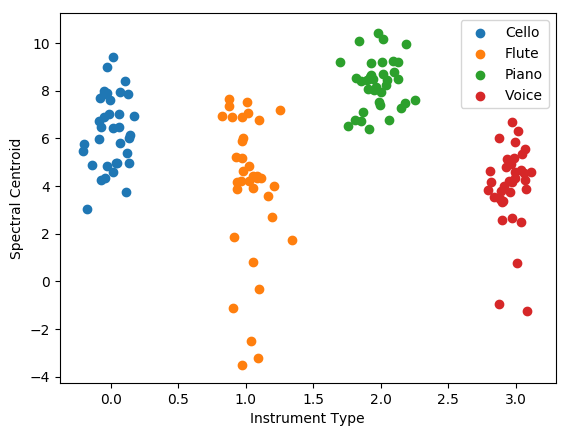

In [42]:
# which feature index are we plotting?
feat_i = 1

scatter(0.1*randn(35,1),centData[cell_is,feat_i],label = "Cello")
scatter(1+0.1*randn(35,1),centData[flut_is,feat_i],label = "Flute")
scatter(2+0.1*randn(35,1),centData[pian_is,feat_i],label = "Piano")
scatter(3+0.1*randn(35,1),centData[hvoi_is,feat_i],label = "Voice")
ylabel("Spectral Centroid")
xlabel("Instrument Type")
legend();

Modify the cell above to visualize how well other spectral features separate the different kinds of instruments (don't forget to change the label of the y axis accordingly). Out of all the features we extracted, what seem to be the top two features someone could use to separate different kinds of instrument sounds?

Once you have decided which two features, store each in two vectors called `feat1` (with size 140x1) and `feat2` (also with size 140x1).

In [ ]:
# your code here:
feat1 = 
feat2 = 

Run the cell below to generate a scatter plot of the two features you selected.

In [ ]:
scatter(feat1[cell_is],feat2[cell_is],label = "Cello")
scatter(feat1[flut_is],feat2[flut_is],label = "Flute")
scatter(feat1[pian_is],feat2[pian_is],label = "Piano")
scatter(feat1[hvoi_is],feat2[hvoi_is],label = "Voice")
xlabel("Feature No.1")
ylabel("Feature No.2")
legend();

We have reach the end of the first chapter. We have covered how digital audio captures the information of musical objects and have reviewed how spectral feature extraction reduces the dimensionality of digital audio data. In the next chapter we will explore algorithms that automate a task like differentiating between musical objects (e.g. musical instruments).

Review Questions:
1. Why did we say that an object can be described by an infinite number of features?
2. Which other audio features that we didn't study here do you think we can use to differentiate between the four musical instruments in the small version of the dataset?
3. If we record a friend playing piano or cello, how similar or dissimilar will our friend's data be compared to what we observed in the small version of the dataset?
